In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'trainimage']


In [ ]:
%cd ..

In [ ]:
%cd input

In [ ]:
%cd ..

In [9]:
%ls

__notebook_source__.ipynb


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import shutil

In [11]:
%ls

__notebook_source__.ipynb  test.csv


In [14]:
#try:
#    shutil.move('/kaggle/input/trainimage','/kaggle/working')
#except:
#    print('ignore_error')

In [13]:
#try:
#    shutil.move('/kaggle/input/test.csv','/kaggle/working')
#except:
#    print('ignore_error')

In [15]:
%ls

__notebook_source__.ipynb  test.csv  trainimage/


In [16]:
%mv test.csv trainimage

In [18]:
%cd trainimage

/kaggle/working/trainimage


In [19]:
from fastai.vision import *

In [21]:
train=pd.read_csv('train.csv')
train.head(10)

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4
5,8.jpg,1
6,9.jpg,5
7,10.jpg,2
8,12.jpg,5
9,13.jpg,2


In [28]:
root=os.getcwd()
%mkdir test

In [29]:
%ls

test/  test.csv  train/  train.csv


In [23]:
tfms = get_transforms(do_flip=True,flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [24]:
np.random.seed(42)
src = (ImageList.from_csv(root, 'train.csv', folder='train')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [71]:
%cd train

/kaggle/working/trainimage/train


In [76]:
train_images=[]
for file in sorted(list(glob.glob('*.jpg')),key=lambda x:int(x[:-4])):
    if str(os.path.splitext(file)[0]+os.path.splitext(file)[1]) not in list(test['image_name']):
        srcBGR=cv2.imread(file)
        destRGB = cv2.cvtColor(srcBGR,cv2.COLOR_BGR2RGB)
        train_images.append(destRGB)


In [77]:
len(train_images)

17034

In [78]:
%cd ..

/kaggle/working/trainimage


In [85]:
%cd ..

/kaggle/working/trainimage


In [88]:
%mkdir training

In [89]:
import imageio
for image_name,image in zip(list(test['image_name']),images):
    imageio.imwrite('test/'+image_name, image)
for image_name,image in zip(list(train['image_name']),train_images):
    imageio.imwrite('training/'+image_name, image)


In [95]:
%cd ..

/kaggle/working/trainimage


In [96]:
print(root)

/kaggle/working/trainimage


In [97]:
np.random.seed(42)
src = (ImageList.from_csv(root, 'train.csv', folder='training')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [98]:
train_data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

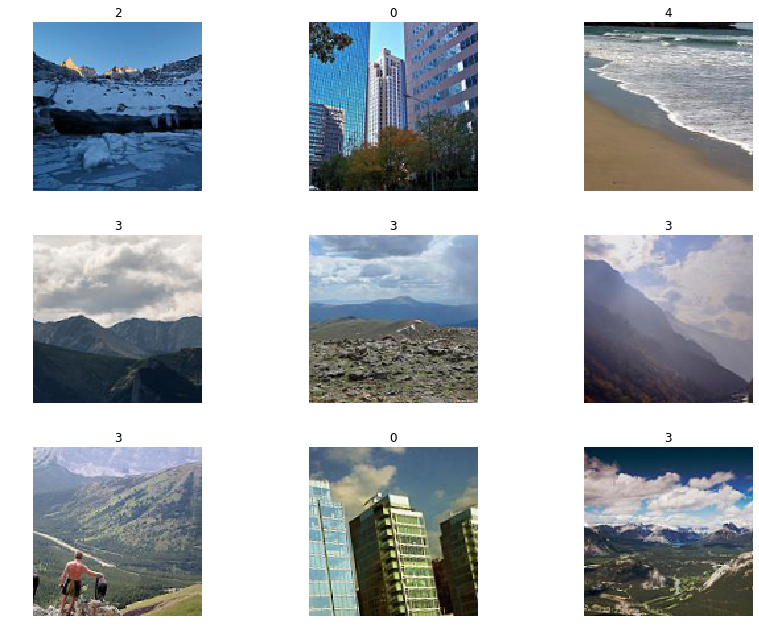

In [99]:
train_data.show_batch(rows=3, figsize=(12,9))

In [100]:
arch = models.resnet50
data.classes,data.c

(['0', '1', '2', '3', '4', '5'], 6)

In [41]:
test=pd.read_csv('test.csv')
test.head()

,image_name
0,3.jpg
1,5.jpg
2,6.jpg
3,11.jpg
4,14.jpg


In [59]:
import cv2
import glob
#%cd train
images=[]
for file in sorted(list(glob.glob('*.jpg')),key=lambda x:int(x[:-4])):
    if str(os.path.splitext(file)[0]+os.path.splitext(file)[1]) in list(test['image_name']):
        srcBGR=cv2.imread(file)
        destRGB = cv2.cvtColor(srcBGR,cv2.COLOR_BGR2RGB)
        images.append(destRGB)

7301


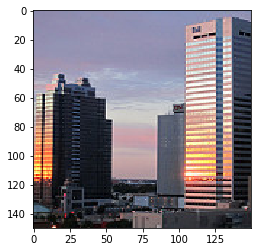

In [61]:
import matplotlib.pyplot as plt
print(len(images))
plt.imshow(images[1])

In [ ]:
#{'buildings' -> 0, 

#'forest' -> 1,

#'glacier' -> 2,

#'mountain' -> 3,

#'sea' -> 4,

#'street' -> 5 }

In [63]:
from fastai.imports import *


learn = cnn_learner(data,arch,metrics=accuracy)

In [64]:
learn.lr_find()
#learn.summary()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


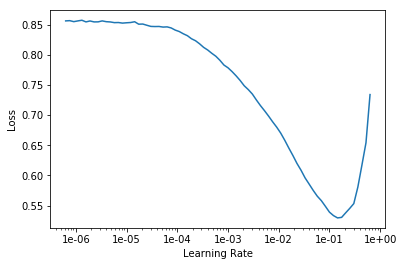

In [65]:
learn.recorder.plot()

In [66]:
%cd ..
#learn.export()

/kaggle/working/trainimage


In [67]:
lr=0.001
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time


Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", 

KeyboardInterrupt: 

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

In [ ]:
losses

In [ ]:
#{'buildings' -> 0, 

#'forest' -> 1,

#'glacier' -> 2,

#'mountain' -> 3,

#'sea' -> 4,

#'street' -> 5 }
img = open_image('test/11.jpg')
_,target,pred= learn.predict(img)
print(target)
learn.data.classes[pred.argmax()]

In [ ]:
plt.imshow(images[3])


In [ ]:
%ls

In [ ]:
%cd train
            

In [5]:
%ls

__notebook_source__.ipynb


In [ ]:
%mkdir test

In [ ]:
%ls

In [ ]:
import imageio
for image_name,image in zip(list(test['image_name']),images):
    imageio.imwrite('test/'+image_name, image)

In [ ]:
%cd test

In [ ]:
%ls

In [ ]:
%cd ..

In [ ]:
%ls

In [ ]:
from fastai import *
from fastai.vision import *
tfms_from_model??

In [ ]:
path='/kaggle/working/trainimage'

In [ ]:
os.getcwd()